In [233]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import re 
import matplotlib.pyplot as plt
import nltk
import string
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [418]:
# read tweets data
tweets_df = pd.read_csv('/content/drive/MyDrive/ML Projects/Tweet analysis #budget2023/tweets_data.csv')

In [419]:
tweets_df

,date,user_name,display_name,content,followers,user_location,retweet_count,like_count
0,2023-02-02 07:12:41+00:00,saudev001,Saurabh Srivastava - ibcoder.eth | ibcoder.sol,Adani Hindenburg issue explained from Geopolit...,371,"Lucknow, India",0,0
1,2023-02-02 07:12:40+00:00,NavyaNehra,Navya Nehra,"Apart from #DutyBeyondBorder, Salute to BSF wh...",224,NaN,0,0
2,2023-02-02 07:12:37+00:00,mylove_humanity,🅰🅰🆉🅰🅳 - ਆਜ਼ਾਦ,𝐍𝐞𝐰 𝐀𝐠𝐞𝐧𝐝𝐚 𝐨𝐟 #Khalistanis #𝐏𝐚𝐤𝐢𝐬𝐭𝐚𝐧𝐢 \n\nब्र...,1171,Kailaasa.org,0,0
3,2023-02-02 07:12:35+00:00,HukusBukus_786,HukusBukus,#IndianArmy conducted a #painting compititon f...,554,NaN,0,0
4,2023-02-02 07:12:33+00:00,ABPNews,ABP News,WATCH: बजट कॉन्क्लेव में जफर इस्लाम Vs गौरव वल...,13242811,India,0,0
...,...,...,...,...,...,...,...,...
86879,2023-02-01 00:05:06+00:00,matthew_kreklau,Matthew Kreklau,https://t.co/ilb3e7eS4y #loveisland #TheLastOf...,1083,"Detroit, MI",0,0
86880,2023-02-01 00:03:50+00:00,EdNapier,Ed Napier,"Math doesn't care about your ""feelings""!\n\n#E...",159,"Douglasville, Georgia",0,0
86881,2023-02-01 00:02:50+00:00,TizzyStifler,Tizzy♎,@MBuhari @cbn @OfficialAPCNg 👎\nJust retweet \...,3071,Nigeria,0,1
86882,2023-02-01 00:02:20+00:00,PROPKING12,PROP KING 👑 🏀🏈🏒⚾️⚽️💰,NHL ANYTIME GOALSCORER PARLAY!!!! +6442 IS A H...,272,"Toronto, Ontario",0,2


In [236]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86884 entries, 0 to 86883
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            86884 non-null  object
 1   user_name       86884 non-null  object
 2   display_name    86883 non-null  object
 3   content         86884 non-null  object
 4   followers       86884 non-null  int64 
 5   user_location   71946 non-null  object
 6   retweet_count   86884 non-null  int64 
 7   like_count      86884 non-null  int64 
 8   tweet_language  86884 non-null  object
dtypes: int64(3), object(6)
memory usage: 6.0+ MB


#Text cleaning and preprocessing

### Extracting date and time from date column




In [237]:
tweets_df['date'] = pd.to_datetime(tweets_df['date'])

tweets_df['tweet_date'] = tweets_df['date'].dt.date

In [238]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86884 entries, 0 to 86883
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   date            86884 non-null  datetime64[ns, UTC]
 1   user_name       86884 non-null  object             
 2   display_name    86883 non-null  object             
 3   content         86884 non-null  object             
 4   followers       86884 non-null  int64              
 5   user_location   71946 non-null  object             
 6   retweet_count   86884 non-null  int64              
 7   like_count      86884 non-null  int64              
 8   tweet_language  86884 non-null  object             
 9   tweet_date      86884 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 6.6+ MB


##Extracting hashtags from content

In [239]:
tweets_df['content'] = tweets_df['content'].apply(lambda x: x.lower())

In [240]:
tweets_df['content'][86882]

'nhl anytime goalscorer parlay!!!! +6442 is a huge bag and we want it!!!!!!!!!!!!🔥🚨💰🚨🔥🚨🔥🚨🔥🚨🔥🚨#gamblingtwitter #sportsbettingtwitter #budget2023 #nhlallstarvote 따끈따끈_도영빵_생일이_왔옹 https://t.co/xzib9cpdxk'

In [391]:
tweets_df['hashtags'] = tweets_df['content'].apply(lambda x : re.findall('#[a-z]+|#[a-z]+\d+',x))

In [392]:
tweets_df['hashtags']  = tweets_df['hashtags'].apply(lambda x : re.sub(r'#|budget', ''," ".join(x)))

In [389]:
tweets_df['mentioned'] = tweets_df['content'].apply(lambda x : re.findall('@[a-z]+|@[a-z]+\d+',x))

In [244]:
# re.sub(r'#[a-zA-z]+ |#[a-zA-z]+\d+',"",x)

In [320]:
# text after removing hashtahs , mentions, some common words like [rs,regime,lakhs,2023,tax] and any links

tweets_df['clean_content'] = tweets_df['content'].apply(lambda x : re.sub(r'#[a-zA-z]+|#[a-zA-z]+\d+|https:\/\/\S+|http:\/\/\S+|\\n|@[a-z]+|@[a-z]+\d+|rs|regime|lakhs|2023|tax|budget|lakh|new',"",x))

In [321]:
# function to remove emojis

def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [322]:
tweets_df['clean_content'] = tweets_df['clean_content'].apply(deEmojify)

In [324]:
# remove punctions and stop words

stop_words = set(stopwords.words('english'))

# function to remove stop words and punctions

def remove_stop_words(text):
  words = word_tokenize(text)
  filtered_words = [word for word in words if word.lower() not in stop_words]
  sentence = " ".join(filtered_words)
  
  filtered_sentence = "".join([char for char in sentence if char not in string.punctuation or char == "."])
  return filtered_sentence

In [325]:
tweets_df['clean_content'] = tweets_df['clean_content'].apply(remove_stop_words)

# Exploratory data analysis(EDA)

In [326]:
tweets_df.head()

,date,user_name,display_name,content,followers,user_location,retweet_count,like_count,tweet_language,tweet_date,hashtags,mentioned,clean_content,num_words,count_positive_words,count_negative_words,polarity_score,sentiment
0,2023-02-02 07:12:41+00:00,saudev001,Saurabh Srivastava - ibcoder.eth | ibcoder.sol,adani hindenburg issue explained from geopolit...,371,"Lucknow, India",0,0,en,2023-02-02,"[#gautamadani, #budget]",[@youtube],adani hindenburg issue explained geopolitical ...,25,0,3,-1.0,negative
1,2023-02-02 07:12:40+00:00,NavyaNehra,Navya Nehra,"apart from #dutybeyondborder, salute to bsf wh...",224,NaN,0,0,en,2023-02-02,"[#dutybeyondborder, #priyankapaltan, #shivthak...",[],apart salute bsf always work safety citizens ...,51,2,3,-0.2,negative
2,2023-02-02 07:12:37+00:00,mylove_humanity,🅰🅰🆉🅰🅳 - ਆਜ਼ਾਦ,𝐍𝐞𝐰 𝐀𝐠𝐞𝐧𝐝𝐚 𝐨𝐟 #khalistanis #𝐏𝐚𝐤𝐢𝐬𝐭𝐚𝐧𝐢 \n\nब्र...,1171,Kailaasa.org,0,0,hi,2023-02-02,"[#khalistanis, #budget]",[],,28,0,0,0.0,neutral
3,2023-02-02 07:12:35+00:00,HukusBukus_786,HukusBukus,#indianarmy conducted a #painting compititon f...,554,NaN,0,0,en,2023-02-02,"[#indianarmy, #painting, #children, #budgam, #...",[],conducted compititon local chakshera village ...,39,0,0,0.0,neutral
4,2023-02-02 07:12:33+00:00,ABPNews,ABP News,watch: बजट कॉन्क्लेव में जफर इस्लाम vs गौरव वल...,13242811,India,0,0,hi,2023-02-02,"[#abpbudgetconclave, #unionbudget, #budget]","[@romanaisarkhan, @syedzafarbjp, @gouravvallabh]",watch vs,40,0,0,0.0,neutral


## Number of words per tweet 

In [327]:
# calculated on raw tweets

tweets_df['num_words'] = tweets_df['content'].apply(lambda x :len(nltk.word_tokenize(x)))

In [328]:
# Average number of words 
tweets_df['num_words'].mean()

29.350283136135538

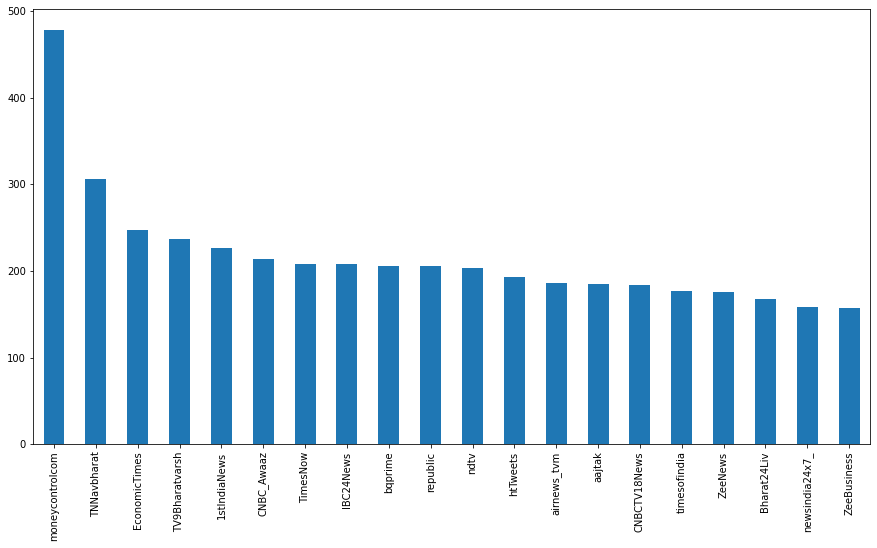

In [417]:
# top 20 users with most tweets
plt.figure(figsize=(15,8))
tweets_df['user_name'].value_counts()[:20].plot(kind='bar')

## Positive and negative word count per tweet

In [331]:
# In this function we pass list of positive/negative words to count.

def get_score(x,words):
  counter = 0
  for word in word_tokenize(x):
    if word in words:
      counter += 1
  return counter

In [332]:
# Extracting words from positive words file

positive_words =[]

with open('positive-words.txt', 'r',encoding='latin-1') as input_file:
        for line in input_file.readlines():
          line = line.replace("\n", "")
          positive_words.append(line)


In [333]:
# Number of positive words per tweet

tweets_df['count_positive_words'] = tweets_df['clean_content'].apply(lambda x: get_score(x,positive_words))

In [334]:
# Extracting words from negative words file
negative_words =[]

with open('negative-words.txt', 'r',encoding='latin-1') as input_file:
        for line in input_file.readlines():
          line = line.replace("\n", "")
          negative_words.append(line)

In [335]:
# Number of negative words per tweet

tweets_df['count_negative_words'] = tweets_df['clean_content'].apply(lambda x: get_score(x,negative_words))

## Polarity score

In [336]:
tweets_df['polarity_score'] = tweets_df.apply(lambda x: (x['count_positive_words'] - x['count_negative_words']) / ((x['count_positive_words'] + x['count_negative_words']) + 0.000001), axis=1)

## The below criteria is used to map sentiment of of tweet

Neutral : between -0.05 - 0.05 (polarity score)

negative : < -0.05 

positive : > 0.05

In [337]:
tweets_df['sentiment'] = tweets_df['polarity_score'].apply(lambda x : 'positive' if x > 0.05 else 'negative' if x < -0.05 else 'neutral' )

Text(0, 0.5, '')

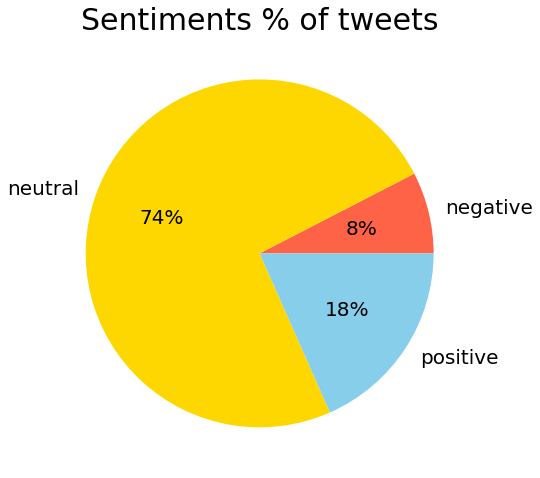

In [338]:
plt.figure(figsize=(15,8))

tweets_df.groupby('sentiment').size().plot(kind='pie',autopct='%.0f%%', textprops={'fontsize': 20},
                                 colors=['tomato', 'gold', 'skyblue'])
plt.title("Sentiments % of tweets",fontdict = {'fontsize' : 30})
plt.ylabel("")

#neutral sentiment word cloud

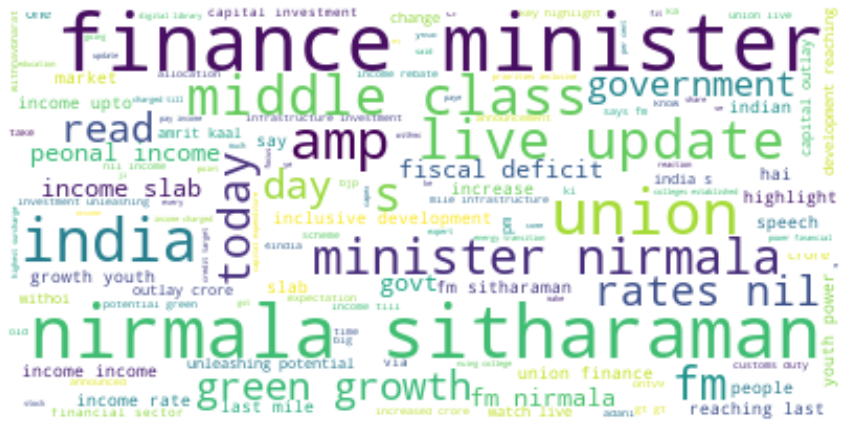

In [340]:
text = " ".join(i for i in tweets_df[tweets_df['sentiment'] == 'neutral']['clean_content'])
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Hashtags in neutral tweet

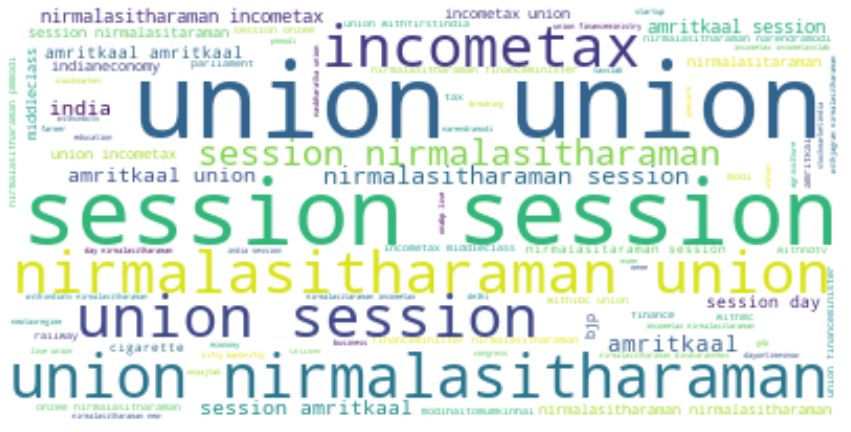

In [393]:
text = " ".join(i for i in tweets_df[tweets_df['sentiment'] == 'neutral']['hashtags'])
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#Positive sentiment wordcloud

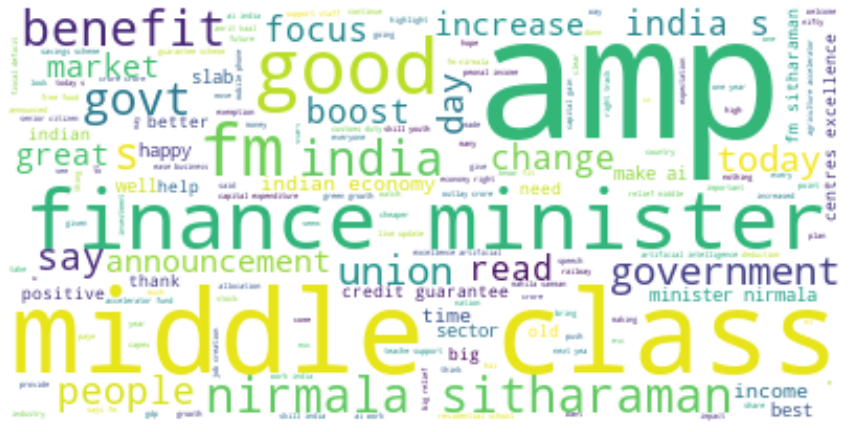

In [341]:
text = " ".join(i for i in tweets_df[tweets_df['sentiment'] == 'positive']['clean_content'])
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Hashtags in positive tweet

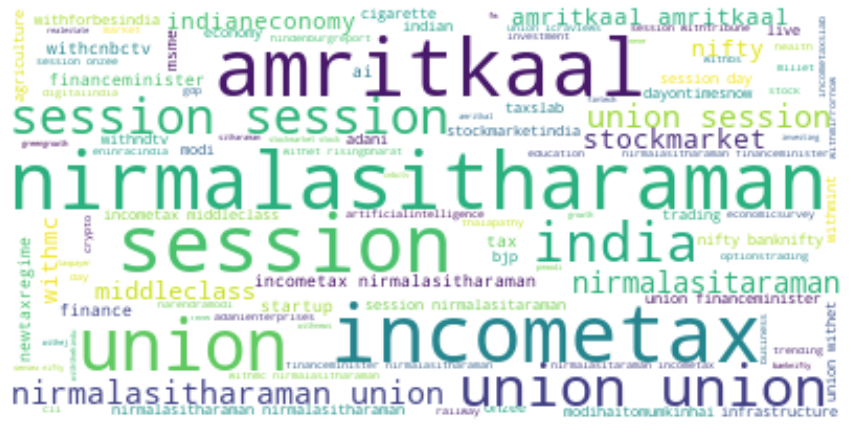

In [394]:
text = " ".join(i for i in tweets_df[tweets_df['sentiment'] == 'positive']['hashtags'])
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#negative sentiment wordcloud

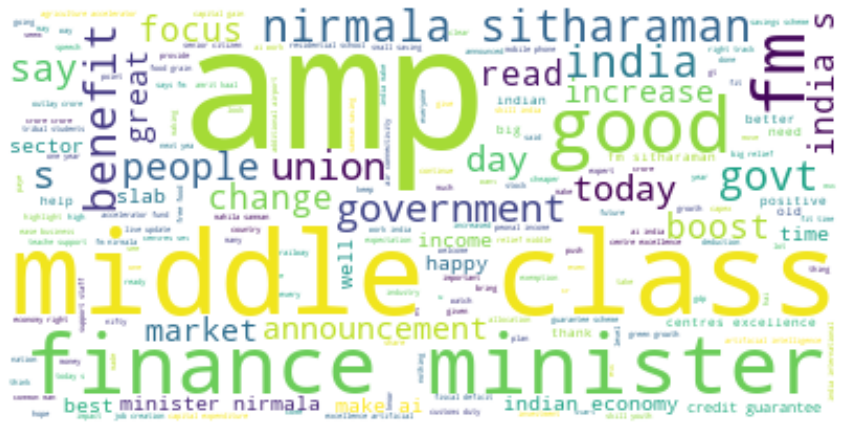

In [408]:
text = " ".join(i for i in tweets_df[tweets_df['sentiment'] == 'positive']['clean_content'])
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Hashtags in negative tweet

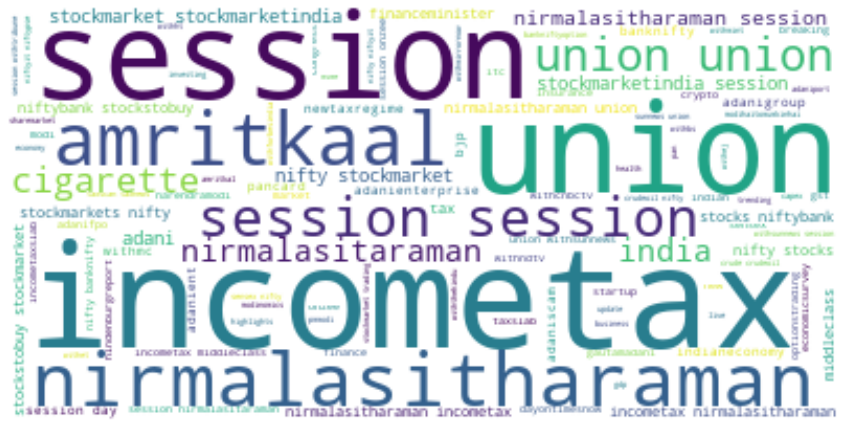

In [395]:
text = " ".join(i for i in tweets_df[tweets_df['sentiment'] == 'negative']['hashtags'])
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

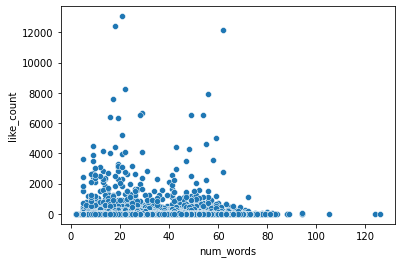

In [409]:
# Plot of number of words per tweet and likes count
sns.scatterplot(x=tweets_df['num_words'] , y=tweets_df['like_count'])

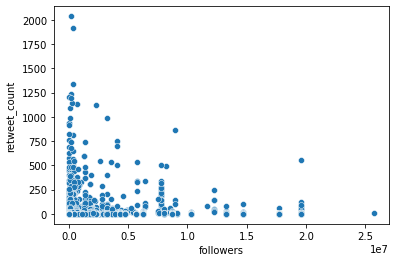

In [410]:
# plot of followers and retweet
sns.scatterplot(x=tweets_df['followers'] , y=tweets_df['retweet_count'])

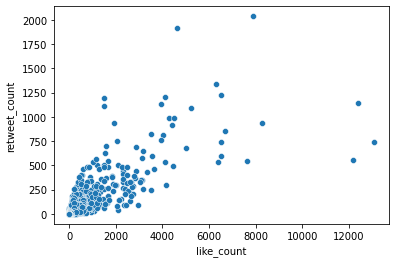

In [411]:
# plot for number of retweets and number of likes
sns.scatterplot(x=tweets_df['like_count'] , y=tweets_df['retweet_count'])